# ML Report - cardiovascular disease

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset and a first view of the dataset
df = pd.read_csv("../data/cardio_train.csv", sep=";").drop(columns="id")
df["age"] = (df["age"]/365).astype(int) # Convert age from days to years
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## Exploring data
Text about eda

0.5374478365912585

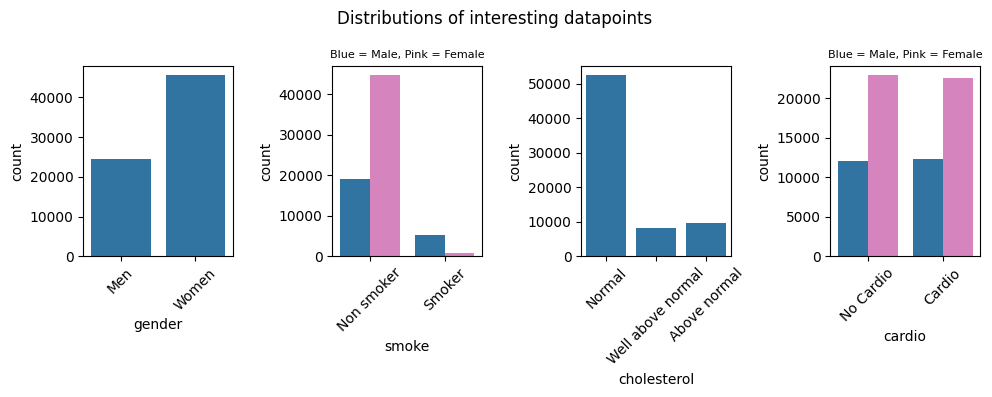

In [34]:
# EDA on dataset
from helpers import rename_columns

# Transform copy of df
df_copy = df.copy() 
df_renamed = rename_columns(df_copy)

# Setting up for plot variables for plots
cols_countplot = ["gender", "smoke", "cholesterol", "cardio"]
colors = sns.color_palette().as_hex()
blue, pink = colors[0], colors[6]

fig, axs = plt.subplots(nrows=1,ncols=len(cols_countplot), figsize=(10,4))
for i, col in enumerate(cols_countplot):
    if col in ["gender", "cholesterol"]:
        sns.countplot(ax=axs[i], x=df_renamed[col])
    else: 
        sns.countplot(ax=axs[i], x=df_renamed[col], hue=df_renamed["gender"], palette=[blue, pink], legend=None)
        axs[i].set_title("Blue = Male, Pink = Female", fontsize=8)
    axs[i].tick_params(axis="x", labelrotation=45)

fig.suptitle("Distributions of interesting datapoints")
fig.tight_layout()

plt.savefig("../visualizations/g-s-ch-c_distribution.png")
women, men = df["gender"].value_counts()
men/women

Längd och viktfördelning

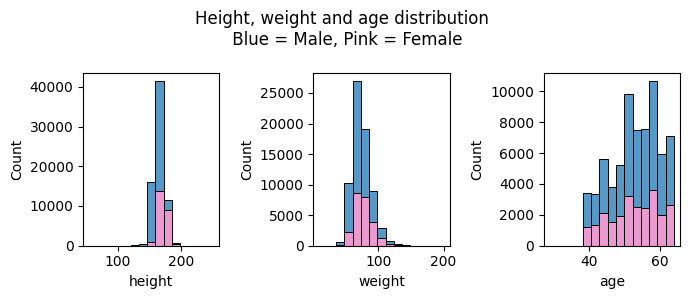

In [35]:
fig, axs = plt.subplots(1,3, figsize=(7,3))
cols_histplot = ["height", "weight", "age"]

for i, col in enumerate(cols_histplot):
    sns.histplot(ax=axs[i], data=df, x=col, hue="gender", palette=[blue,pink], bins=15, legend=None, multiple="stack")
fig.suptitle("Height, weight and age distribution \n Blue = Male, Pink = Female")
fig.tight_layout()

plt.savefig("../visualizations/h-w-a_distribution.png")

Text about heatmap
correlation between height and gender which is expected. The same for cholesterol and cluc. And smoke vs alcohol

Smoke  and gender might be correlated bacause women are more represented by tha data then men

<Axes: >

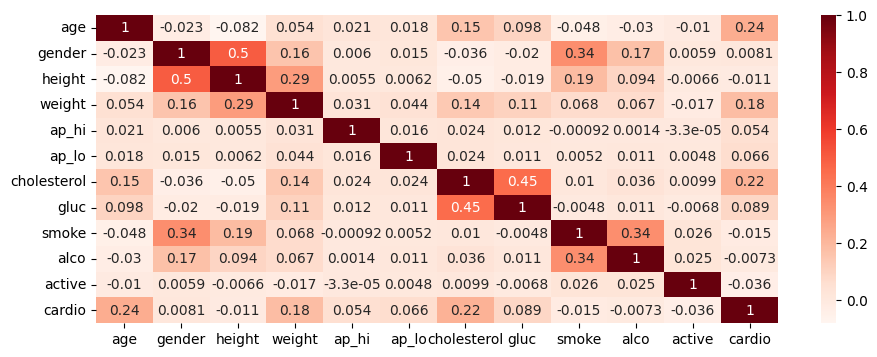

In [36]:
plt.figure(figsize=(11,4))
sns.heatmap(df.corr(), cmap="Reds", annot=True)


# Feature engineering
Create feature for BMI (Body mass  index)  


BMI = $\frac{mass(kg)}{height(m)^2}$  

Dropping outliers where BMI > 60, we dont have any people in the data that weighs over 200kg so BMIs over 60 is unlikely to be relevant

Under BMI of 11 is extremely unusual aswell 

In [38]:
from helpers import transform_bmi, transform_bloodpressure
# Feature BMI
df_copy[df_copy["height"]<120]
df["BMI"] = round(df["weight"] / (df["height"].astype(float)/100)**2, 1)

# Dropping BMI outliers
idx_to_drop = (list(df.query("BMI > 70 or `BMI` < 14").index))
df.drop(idx_to_drop, inplace=True)
# Add categorical BMI feature
df["BMI_cat"] = df["BMI"].apply(transform_bmi)




array([17.8, 17.3, 17.6, 18.1, 16.7, 17.9, 18.4, 17.2, 16.2, 15.4, 15.6,
       15.8, 16.1, 17. , 18.3, 18. , 17.4, 14.7, 16.8, 16.6, 16.5, 17.5,
       18.2, 16. , 17.1, 17.7, 14.5, 15.5, 14.9, 16.3, 16.4, 14.6, 15. ,
       16.9, 15.1, 15.7, 15.2, 14.8, 15.9])